In [2]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',  # or '127.0.0.1'
    user='root',       # your MySQL username
    password='Punarbasu_03',
    database='ECOM'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:\\Users\\punar\\Desktop\\streamlit-app\\data'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQCalculate the year-over-year growth rate of total salesL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [14]:
import sqlite3
import pandas as pd
import mysql.connector

# Connect to MySQL
mysql_db = mysql.connector.connect(
    host='localhost',
    user='root',   
    password='Punarbasu_03',
    database='ECOM'
)

# Create SQLite connection
sqlite_conn = sqlite3.connect("ecom.db")


tables = ["products", "order_items", "payments", "customers", "sellers", "geolocation", "orders"]

for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table}", mysql_db)
    df.to_sql(table, sqlite_conn, if_exists="replace", index=False)

sqlite_conn.close()
mysql_db.close()
print("✅ MySQL → SQLite export complete: ecom.db created")


C:\Users\punar\AppData\Local\Temp\ipykernel_17972\3970634569.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", mysql_db)


✅ MySQL → SQLite export complete: ecom.db created


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install mysql.connector

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np

db = sqlite3.connect("ecom.db")
cur = db.cursor()



#List all unique cities that the customers belong to


In [16]:
query= """select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data, columns=["unique_city"], index=range(1, len(data) + 1))
df

,unique_city
1,franca
2,sao bernardo do campo
3,sao paulo
4,mogi das cruzes
5,campinas
...,...
4115,siriji
4116,natividade da serra
4117,monte bonito
4118,sao rafael


#count number of orders placed in 2017

In [18]:
query = """
SELECT COUNT(order_id)
FROM orders
WHERE strftime('%Y', order_purchase_timestamp) = '2017'
"""
cur.execute(query)
data = cur.fetchall()
print(data[0])


(225505,)


#Find the total sales per category

In [19]:
query= """select products.product_category as category, round(sum(payments.payment_value),2) as sales 
from products join order_items
on products.product_id=order_items.product_id
join payments 
on payments.order_id=order_items.order_id 
group by category"""
cur.execute(query)
data=cur.fetchall()
data

[(None, 12134482.08),
 ('Agro Industria e Comercio', 5699069.28),
 ('Art', 1487660.64),
 ('Arts and Crafts', 111656.16),
 ('Bags Accessories', 8983261.92),
 ('Blu Ray DVDs', 380893.44),
 ('CITTE AND UPHACK FURNITURE', 287929.92),
 ('CONSTRUCTION SECURITY TOOLS', 3153169.44),
 ('Casa Construcao', 6558973.92),
 ('Christmas articles', 911748.96),
 ('Construction Tools Construction', 11590830.24),
 ('Construction Tools Garden', 2034931.68),
 ('Construction Tools Illumination', 3490199.04),
 ('Construction Tools Tools', 1011315.36),
 ('Cool Stuff', 37425504.0),
 ('Drink foods', 1309907.04),
 ('ELECTRICES 2', 5979046.08),
 ('Fashion Bags and Accessories', 10471597.44),
 ('Fashion Calcados', 1556291.52),
 ("Fashion Children's Clothing", 37712.16),
 ("Fashion Men's Clothing", 829967.04),
 ('Fashion Sport', 175004.16),
 ('Fashion Underwear and Beach Fashion', 610297.92),
 ("Fashion Women's Clothing", 245261.76),
 ('Furniture', 1516749.12),
 ('Furniture Decoration', 68648466.72),
 ('Furniture Ki

#Find the percentage of orders that were purchased in installments

In [24]:
query = """SELECT ( (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END) * 1.0) / COUNT(*) ) * 100
FROM payments"""

cur.execute(query)
data = cur.fetchall()
data[0][0]
print(f"{data[0][0]}")

99.99807481277554


#count number of customers from each state

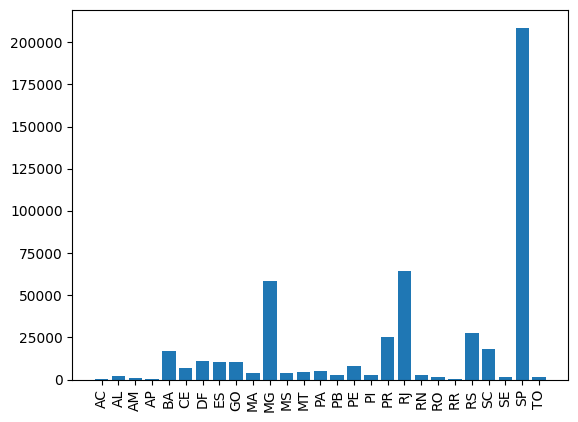

In [25]:
query = """select customer_state, count(customer_id) from customers
group by customer_state""" 
cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data, columns=["state","customer_count"])

plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.show()   

#calculate the number of orders per month in 2018

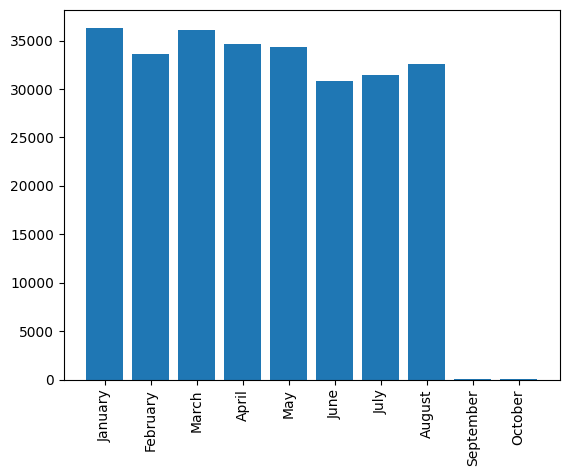

In [27]:
query = """SELECT CASE strftime('%m', order_purchase_timestamp)
         WHEN '01' THEN 'January'
         WHEN '02' THEN 'February'
         WHEN '03' THEN 'March'
         WHEN '04' THEN 'April'
         WHEN '05' THEN 'May'
         WHEN '06' THEN 'June'
         WHEN '07' THEN 'July'
         WHEN '08' THEN 'August'
         WHEN '09' THEN 'September'
         WHEN '10' THEN 'October'
         WHEN '11' THEN 'November'
         WHEN '12' THEN 'December'
       END AS month_name,
       COUNT(*) AS orders
FROM orders
WHERE strftime('%Y', order_purchase_timestamp) = '2018'
GROUP BY strftime('%m', order_purchase_timestamp)
ORDER BY strftime('%m', order_purchase_timestamp)"""

cur.execute(query)
data=cur.fetchall()
data

df= pd.DataFrame(data, columns=["month","orders"])
#df.reset_index(drop=False)
plt.bar(df["month"], df["orders"])
plt.xticks(rotation=90)
plt.show()

#find the average number of product per order, grouped by customer city

In [31]:
query = """with count_per_order as(select orders.order_id,orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id) 
select customers.customer_city, avg(count_per_order.oc) as average_orders
from customers join count_per_order 
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""
#print("average_orders", data)
cur.execute(query)
data=cur.fetchall()
data

[('abadia dos dourados', 15.0),
 ('abadiania', 15.0),
 ('abaete', 15.0),
 ('abaetetuba', 19.09090909090909),
 ('abaiara', 15.0),
 ('abaira', 15.0),
 ('abare', 15.0),
 ('abatia', 15.0),
 ('abdon batista', 30.0),
 ('abelardo luz', 15.0),
 ('abrantes', 15.0),
 ('abre campo', 15.0),
 ('abreu e lima', 19.09090909090909),
 ('acaiaca', 15.0),
 ('acailandia', 15.0),
 ('acajutiba', 15.0),
 ('acarau', 16.875),
 ('acari', 15.0),
 ('acegua', 15.0),
 ('acopiara', 17.142857142857142),
 ('acreuna', 19.285714285714285),
 ('acu', 20.0),
 ('acucena', 15.0),
 ('adamantina', 15.833333333333334),
 ('adhemar de barros', 15.0),
 ('adolfo', 15.0),
 ('adrianopolis', 15.0),
 ('adustina', 15.0),
 ('afogados da ingazeira', 15.0),
 ('afonso claudio', 15.0),
 ('afranio', 15.0),
 ('agisse', 15.0),
 ('agrestina', 15.0),
 ('agrolandia', 15.0),
 ('agronomica', 15.0),
 ('agua boa', 17.5),
 ('agua branca', 18.0),
 ('agua clara', 15.0),
 ('agua comprida', 15.0),
 ('agua doce', 30.0),
 ('agua doce do norte', 18.75),
 ('agu

#calculate the percentage of total revenue generated by each product category

In [33]:
query = """select products.product_category as category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) as sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""
cur.execute(query)
data=cur.fetchall()  
data
df = pd.DataFrame(data, columns=["product", "percentage"])
df.head()

,product,percentage
0,bed table bath,128.37
1,HEALTH BEAUTY,124.23
2,computer accessories,118.83
3,Furniture Decoration,107.20
4,Watches present,107.13


  #identify the correlation between the product price and the number of times product has been purchased

In [32]:
query = """select products.product_category, count(order_items.product_id) ,
avg(order_items.price)
from products join order_items
on products.product_id= order_items.product_id
group by products.product_category"""
cur.execute(query)
data=cur.fetchall()  
data
df = pd.DataFrame(data, columns=["product_category", "count", "average price"])
df.head()
arr1=df["count"]
arr2=df["average price"]
np.corrcoef(arr1,arr2)
# The coefficient of correlation is found to be -0.10631552 , which is a very negligible value . so we find that the product prices and the purchases are not correlated

array([[ 1.        , -0.10631552],
       [-0.10631552,  1.        ]])

#calculate the total revenue generated by each seller and rank them based on their revenue

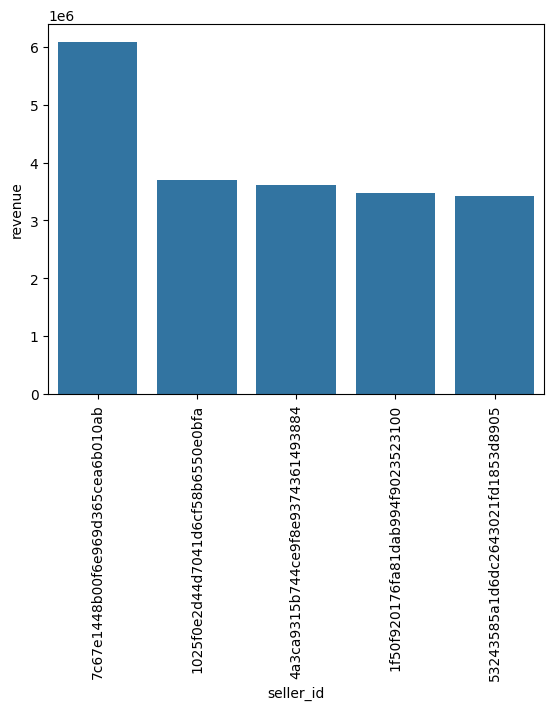

In [34]:
query = """select * , dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id , sum(payments.payment_value) as revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a""" 
cur.execute(query)
data=cur.fetchall()  
data
df=pd.DataFrame(data,columns = ['seller_id', 'revenue','rank'])
df=df.head()
sns.barplot(x="seller_id", y="revenue", data=df)
plt.xticks(rotation=90)
plt.show()


Calculate the moving average of order values for each customer over their order history.

In [35]:
query = """select customer_id as id, order_purchase_timestamp as time, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns= ["id","time","payment", "average"])
df  

,id,time,payment,average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
...,...,...,...,...
2077715,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.37
2077716,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.37
2077717,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.37
2077718,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.37


Calculate the cumulative sales per month for each year.

In [37]:
query = """SELECT years, 
       months, 
       payment, 
       SUM(payment) OVER (ORDER BY years, months) AS cumulative_sales
FROM (
    SELECT strftime('%Y', orders.order_purchase_timestamp) AS years,
           strftime('%m', orders.order_purchase_timestamp) AS months,
           ROUND(SUM(payments.payment_value), 2) AS payment
    FROM orders
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY years, months
    ORDER BY years, months
) AS a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,09,5044.8,5044.8
1,2016,10,1181809.6,1186854.4
2,2016,12,392.4,1187246.8
3,2017,01,2769760.8,3957007.6
4,2017,02,5838160.2,9795167.8
5,2017,03,8997272.0,18792439.8
6,2017,04,8355760.6,27148200.4
7,2017,05,11858376.4,39006576.8
8,2017,06,10225527.6,49232104.4
9,2017,07,11847658.4,61079762.8


Calculate the year-over-year growth rate of total sales

In [39]:
query = """WITH a AS (
    SELECT strftime('%Y', orders.order_purchase_timestamp) AS years,
           ROUND(SUM(payments.payment_value), 2) AS payment
    FROM orders
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY years
    ORDER BY years
)
SELECT years, 
       ((payment - LAG(payment, 1) OVER (ORDER BY years)) /
        LAG(payment, 1) OVER (ORDER BY years)) * 100 AS pct_change
FROM a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
# plt.bar(df["years"], df["yoy % growth"])
# plt.xticks(rotation=90)
# plt.show()
df


,years,yoy % growth
0,2016,NaN
1,2017,12112.703795
2,2018,20.000923


Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [10]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

Identify the top 3 customers who spent the most money in each year.

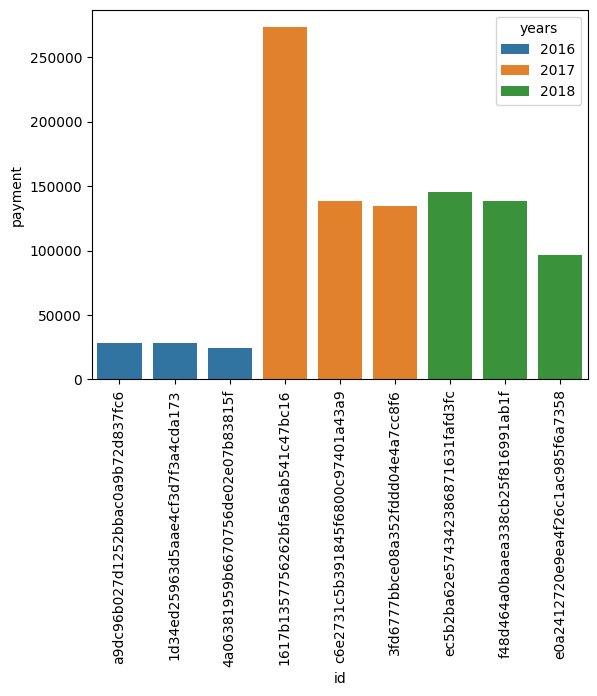

In [41]:
query = """SELECT years, customer_id, payment, d_rank
FROM (
    SELECT strftime('%Y', orders.order_purchase_timestamp) AS years,
           orders.customer_id,
           SUM(payments.payment_value) AS payment,
           DENSE_RANK() OVER (
               PARTITION BY strftime('%Y', orders.order_purchase_timestamp)
               ORDER BY SUM(payments.payment_value) DESC
           ) AS d_rank
    FROM orders
    JOIN payments 
      ON payments.order_id = orders.order_id
    GROUP BY strftime('%Y', orders.order_purchase_timestamp), orders.customer_id
) AS a
WHERE d_rank <= 3"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()